# Malaria Classification CNN

The following dataset consists of PNG images of uninfected cells and cells infected with malaria. The dataset is taken from the NIH website: https://lhncbc.nlm.nih.gov/publication/pub9932

The goal here is to train a deep neural network to be able to classify the images as infected(parasitized) or uninfected.

The Notebook consists of the following sections:
1. Data import
2. Visualisation
3. Generation of additional data
4. Creating the CNN model
5. Training the model
6. Evaluating the model

This notebook was written with help from Jose Portilla's Tensorflow 2 course

## 1. Data import

First we will import all the required libraries.

In [69]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

Now we need to find the paths to the data

In [70]:
data_dir = 'cell_images'

In [71]:
os.listdir(data_dir)

['test', 'train']

The image data directory is split into test and train folders. Now we need the paths of the labelled samples.

In [72]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [73]:
test_path

'cell_images\\test\\'

In [74]:
train_path

'cell_images\\train\\'

In [75]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [76]:
os.listdir(train_path)

['parasitized', 'uninfected']

So both train and test folders have two subfolders: parasitized and uninfected. These are the two classes to identify

## 2. Visualisation

Let's look at a sample image. First we get the path, then the image array and finally the image.

In [77]:
os.listdir(test_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [78]:
example_para_cell = test_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [79]:
example_para_cell

'cell_images\\test\\parasitized\\C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [80]:
imread(example_para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [81]:
imread(example_para_cell).shape

(136, 133, 3)

So the image is 136 x 133 pixels with three colour channels: red green blue

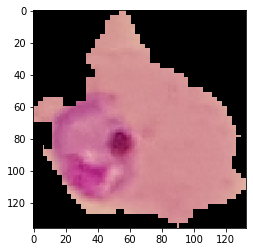

In [82]:
plt.imshow(imread(example_para_cell))

This is what a parasitized cell looks like. Now let's do the same for an uninfected cell

In [83]:
os.listdir(test_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_34.png'

In [84]:
example_uninf_cell = test_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_34.png'

In [85]:
imread(example_uninf_cell).shape

(118, 118, 3)

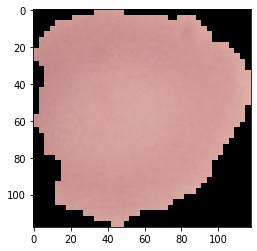

In [86]:
plt.imshow(imread(example_uninf_cell))

The uninfected cell was a different size, 118 x 118 pixels, and looks quite different.

Next, let's find out the number of images and the distribution of image sizes

In [87]:
len(os.listdir(train_path+'parasitized'))

12480

In [88]:
len(os.listdir(train_path+'uninfected'))

12480

In [89]:
len(os.listdir(test_path+'parasitized'))

1300

In [90]:
len(os.listdir(test_path+'uninfected'))

1300

In [91]:
dim1 = []
dim2 = []

for image_name in os.listdir(test_path+'uninfected'):
    image_path = test_path+'uninfected\\'+image_name
    d1, d2, col = imread(image_path).shape
    dim1.append(d1)
    dim2.append(d2)


In [92]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


In [93]:
dim2

[118,
 145,
 151,
 145,
 139,
 136,
 160,
 121,
 142,
 121,
 100,
 151,
 139,
 151,
 112,
 124,
 145,
 115,
 166,
 130,
 133,
 130,
 136,
 136,
 124,
 115,
 142,
 190,
 151,
 163,
 112,
 142,
 151,
 127,
 142,
 172,
 151,
 127,
 154,
 91,
 124,
 139,
 124,
 127,
 148,
 118,
 148,
 157,
 139,
 145,
 154,
 163,
 148,
 130,
 160,
 136,
 121,
 169,
 145,
 115,
 106,
 124,
 130,
 112,
 124,
 106,
 112,
 121,
 100,
 115,
 136,
 118,
 127,
 148,
 130,
 118,
 124,
 139,
 133,
 118,
 121,
 127,
 136,
 127,
 124,
 124,
 136,
 130,
 130,
 112,
 127,
 136,
 130,
 124,
 130,
 109,
 169,
 124,
 142,
 127,
 106,
 130,
 97,
 100,
 145,
 106,
 148,
 136,
 136,
 133,
 121,
 133,
 136,
 157,
 133,
 139,
 127,
 139,
 151,
 157,
 148,
 163,
 145,
 136,
 127,
 130,
 160,
 133,
 130,
 121,
 136,
 145,
 121,
 142,
 148,
 148,
 127,
 139,
 148,
 148,
 151,
 160,
 154,
 145,
 139,
 127,
 121,
 106,
 106,
 145,
 112,
 130,
 124,
 139,
 145,
 142,
 151,
 130,
 118,
 133,
 154,
 136,
 139,
 121,
 142,
 148,
 136,


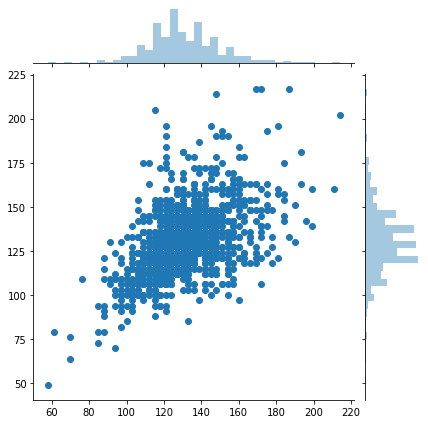

In [94]:
sns.jointplot(dim1,dim2)

In [95]:
np.mean(dim1)

130.92538461538462

In [96]:
np.mean(dim2)

130.75

So the average image width and height is roughly 130 for both dimensions

In [97]:
image_shape = (130, 130, 3)

## 3. Generation of additinal data

In order to enhance the robustness of the model to be able to classify novel images, we can generate additional training data by performing transormations on the existing images. We can do this using Keras' ImageDataGenerator class. This will generate as many new images as is required by the model until it reaches the end of the training epochs.

In [98]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [99]:
imread(example_para_cell).max()

0.9254902

The pixel values are already scaled, so no need to include that in the image generator

In [100]:
image_generator = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.1,
                                    zoom_range=0.1,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

Let's see what this does to a cell image

In [101]:
example_para_cell = imread(example_para_cell)

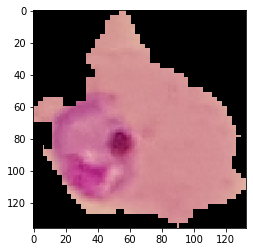

In [102]:
plt.imshow(example_para_cell)

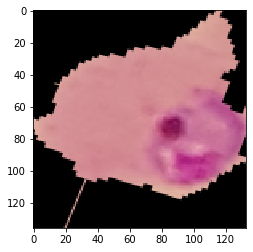

In [103]:
plt.imshow(image_generator.random_transform(example_para_cell))

Now we want to flow batches from the directories with the treain and test sets

In [104]:
train_image_gen = image_generator.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=16,
                                                     class_mode='binary')

Found 24958 images belonging to 2 classes.


In [105]:
test_image_gen = image_generator.flow_from_directory(test_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=16,
                                                     class_mode='binary',
                                                    shuffle=False)

Found 2600 images belonging to 2 classes.


In [106]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [107]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## 4. Creating the model

In [108]:
from tensorflow.keras.models import Sequential

In [109]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [110]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

We also want to add early stopping with the monitor being on the loss of the validation dataset. If the validation loss begins to increase for two epochs this will interrupt the training of the model.

In [112]:
from tensorflow.keras.callbacks import EarlyStopping

In [113]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

## 5. Training the model

In [114]:
#Trained model is also provided

In [115]:
results = model.fit_generator(train_image_gen,
                              epochs=15,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
1560/1560 [==============================] - 1016s 651ms/step - loss: 0.8313 - accuracy: 0.5520 - val_loss: 0.6891 - val_accuracy: 0.5600
Epoch 2/15
1560/1560 [==============================] - 552s 354ms/step - loss: 0.6884 - accuracy: 0.5588 - val_loss: 0.6811 - val_accuracy: 0.5723
Epoch 3/15
1560/1560 [==============================] - 576s 369ms/step - loss: 0.6806 - accuracy: 0.5728 - val_loss: 0.6780 - val_accuracy: 0.5785
Epoch 4/15
1560/1560 [==============================] - 539s 346ms/step - loss: 0.6715 - accuracy: 0.5965 - val_loss: 0.6319 - val_accuracy: 0.6123
Epoch 5/15
1560/1560 [==============================] - 554s 355ms/step - loss: 0.3295 - accuracy: 0.8778 - val_loss: 0.2056 - val_accuracy: 0.9331
Epoch 6/15
1560/1560 [==============================] - 531s 340ms/step - loss: 0.2067 - accuracy: 0.9343 - val_loss: 0.2226 - val_accuracy: 0.9269
Epoch 7/15
1560/1560 [=============

In [116]:
model.save('malaria_CNN.h5')

The model takes a while to train so the trained model can also be loaded

In [117]:
#from tensorflow.keras.models import load_model

In [118]:
#model = load_model('malaria_CNN.h5')

In [119]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

## 6. Evaluating the model

In [120]:
losses = pd.DataFrame(model.history.history)

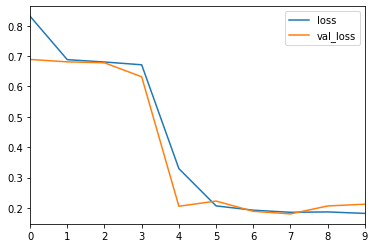

In [121]:
losses[['loss', 'val_loss']].plot()

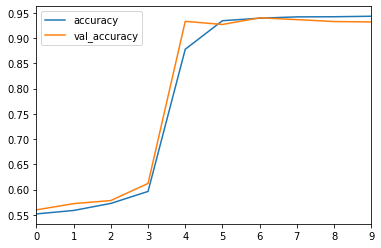

In [122]:
losses[['accuracy', 'val_accuracy']].plot()

Let's evaluate the model on the test data

In [123]:
model.evaluate_generator(test_image_gen)

[0.21887622773647308, 0.9350000023841858]

In [124]:
model.metrics_names

['loss', 'accuracy']

Let's check the classification report.

The true values are:

In [125]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

and the predictions:

In [126]:
predictions = model.predict_generator(test_image_gen)

In [127]:
predictions

array([[1.9878695e-07],
       [2.9885614e-06],
       [5.1771662e-05],
       ...,
       [9.1058749e-01],
       [9.3016237e-01],
       [9.5806825e-01]], dtype=float32)

In [128]:
predictions = predictions > 0.5

In [129]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [130]:
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1300
           1       0.91      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [132]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1180  120]
 [  45 1255]]


### Predicting on an image

In [136]:
from tensorflow.keras.preprocessing import image

In [137]:
example_uninf_cell

'cell_images\\test\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_34.png'

In [141]:
pred_image = image.load_img(example_uninf_cell, target_size=image_shape)

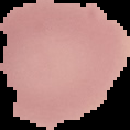

In [142]:
pred_image

In [143]:
pred_image_arr = image.img_to_array(pred_image)

In [144]:
pred_image_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [145]:
pred_image_arr.shape

(130, 130, 3)

In [146]:
pred_image_arr = np.expand_dims(pred_image_arr, axis=0)

In [147]:
pred_image_arr.shape

(1, 130, 130, 3)

In [150]:
pred = model.predict(pred_image_arr)

In [151]:
pred

array([[0.955738]], dtype=float32)

In [152]:
pred > 0.5

array([[ True]])

In [149]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

The prediction was correct!